# Euler's Method

## Introduction

When working with differential equations (DEs), we sometimes encouter DEs that we cannot solve. In these cases, we approximate the solution. One way to do this is with Euler's method (invented by Euly boy himself).

## The Math

The idea of Euler's Method is fairly simple. I like to think of it like following directions from our DE to draw the curve of our solution. From any point in our solution, the DE will tell us how much we should add or subtract in order to get to the next point. So in simplest terms, we do this:
$$y(x_k)\approx y(x_{k-1}) + y'(x_k)$$
where $y(x_k)$ is the next point that we want to approximate in our solution, $y(x_{k-1})$ is the previous point, and $y'(x_k)$ is the slope of our solution at the point that we're trying to approximate.

Let me start with an example. Let's say we have the following DE:
$$y'=2x$$

If you've taken even a little bit of calculus, you'll know exactly what the solution to this DE is. But pretend for a minute that you don't. If we want a particular solution to this DE, we'll need an initial condition. So let's say:
$$y(0)=0$$

Now that we have a DE and an initial condition, let's approxmiate $y(1)$ using that formula above.
$$x_k = 1$$
$$x_{k-1} = 0$$
$$y(x_{k-1})=y(0)=0$$
$$y'(x_k)=y'(1)=2*1=2$$
$$y(1) \approx 0 + 2 = 2$$

Awesome! We've approximated our first point. Let's do another one.
$$x_k = 2$$
$$x_{k-1} = 1$$
$$y(x_{k-1})=y(1)=2$$
$$y'(x_k)=y'(2)=4*1=4$$
$$y(2) \approx 2 + 4 = 6$$

So now we have the following values in our solution:
$$y(0)=0$$
$$y(1)=2$$
$$y(2)=6$$

Since we know what the solution to this DE actually is, we also know that this is a terrible approximation. How do we make this a better approximation? The same way we make our cat photos sharper! We increase the resolution. So far, we have been approximating the solution by integer increments of $x$. We can increase the resolution by making lots of smaller increments of $x$. 

This also means however, that we have to fix our aproximation formula. Right now, our formula looks like this:
$$y(x_k) \approx y(x_{k-1}) + y'(x_k)$$
But what is this actually saying? Let's look at it in terms of units. $y(x)$ has units Ys while $y'(x)$ has units Ys per X. By looking at it that way, we can see that our formula doesn't make any logical sense. It's like if you added your speed to the distance you traveled. What does that mean? Nothing. It doesn't make any sense. To fix this, we can use our knowledge of dimensional analysis. If you're traveling 60 miles/hour for 6 hours, how do you find how far you traveled? You multiply 60 miles/hour by 6 hours. Similarly, we can mupltiply $y'(x)$ by the distance x that we're stepping by. So our new formula becomes:
$$y(x_k)\approx y(x_{k-1}) + y'(x_k)\Delta x$$
where
$$\Delta x=\frac{x_f-x_i}{n}$$
$n$ is the number of steps we want to approximate (resolution), and $x_i\leq x \leq x_f$ is the interval of the solution that we plan to approximate. But now that we know we can use more steps to approximate our solution, we've made more work for ourselves. Or have we...


## Implementing Euler's Method in a computer program

To avoid unnecessary time spent crunching numbers, we are going to make the computer approximate our solution. We are going to use Python for this. 

To start, we'll import a couple of handy packages that will allow us to write less code:

In [35]:
import numpy as np
from matplotlib import pyplot as plt

Now we can initialize some different parameters. Let's start by defining our DE. We'll use our example from the last section, $y'(x)=2x$. This is what it looks like in Python:

In [36]:
def y1(x):
    return 2*x

Now let's specify our upper and lower bounds (xf and x0), the resolution (n), and our initial condition (y0):

In [37]:
x0 = 0
xf = 5
n = 100
y0 = 0

Also recall that we need to compute our step size, $\Delta x=\frac{x_f-x_i}{n}$. We can do this with the code:

In [38]:
deltaX = (xf - x0) / n

Now we want to initialize a couple of arrays that will store our x and y values. Our x array should contain equally spaced values between our bounds. They represent each point at which we are going to approximate our solution. Numpy has a helper function that allows us to do this:

In [39]:
x = np.linspace(x0, xf, n)

By printing x, we can see that we have our desired array:

In [40]:
print(x)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

Our y array will contain the resulting points in our approximation. To start, we'll initialize it with zeros.

In [41]:
y = np.zeros(n)

Awesome! We're done with the initialization. Now let's start approximating. Recall that we approximate using the formula:
$$y(x_k)\approx y(x_{k-1}) + y'(x_k)\Delta x$$
We want to evaluate $y(x_k)$ for each x in our array that we created. We can do this with the following code:

In [42]:
for k in range(1, n):                       # for each step,
    y[k] = y[k-1] + y1(x[k]) * deltaX       # approximate using our formula

Great! We've approximated our solution. Now let's view a graph of it with the following code:

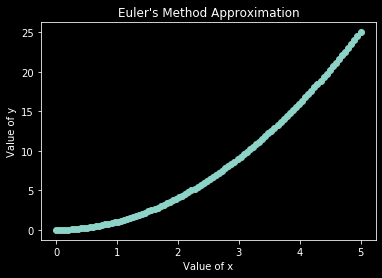

In [43]:
plt.plot(x, y, 'o')
plt.xlabel("Value of x")
plt.ylabel("Value of y")
plt.title("Euler's Method Approximation")
plt.show()

For those of you who know what the solution to $y'(x)=2x$ actually is, I think you'll agree that parabola matches pretty well. 

So there you have it. You can now approximate a DE using a computer and Euler's Method. Try changing the DE to something else in order view other approximations.